In [28]:
import urllib.request as req
url = "http://imgcc.naver.jp/kaze/mission/USER/20180519/35/3012705/157/500x718xedab7ba7e203cd7576d12004.jpg"
req.urlretrieve(url, "test.jpg")

('test.jpg', <http.client.HTTPMessage at 0x118bfa470>)

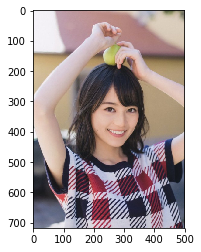

In [7]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

origin_img = cv2.imread("test.jpg")
img = origin_img.copy()
#plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

顔の座標 =  193 263 180 180


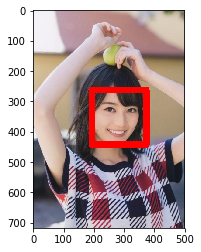

In [8]:
#カスケードファイルを指定して、検出器を作成
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img_face = img

#画像の読み込んでグレースケール
img_gray = cv2.cvtColor(img_face, cv2.COLOR_RGB2GRAY)
#顔認識
face_list = cascade.detectMultiScale(img_gray, minSize = (150, 150))
#結果
if len(face_list) == 0:
    print("失敗")
    quit()
    
for (x,y,w,h) in face_list:
    print("顔の座標 = ", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img_face, (x,y), (x+w, y+h), red, thickness=20)
    
#出力
plt.imshow(cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
cv2.imwrite("out.jpg", img)

True

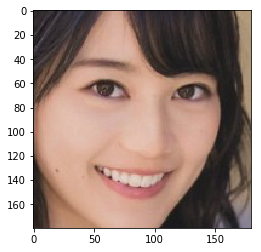

True

In [11]:
#切り取り
img_face_ex = origin_img[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(img_face_ex, cv2.COLOR_BGR2RGB))
plt.show()
#保存
cv2.imwrite("out_face.jpg", img_face_ex)